# Storytelling Data Visualization on Exchange Rates

This project uses figures to help identify changes of Exchange rates.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
print(exchange_rates.head())
print(exchange_rates.tail())
print(exchange_rates.info())
print(exchange_rates.shape)

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

The dataframe contains 5699 rows and 41 columns. The columns are defined as each type of currency and the the row is the value of the currency compared to the Euro on specific days. Only two columns are of type float.

## Data Cleaning

In order to proceed, dates need to be changed to date time and organize by ascending order.

In [54]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [55]:
euro_to_dollar = exchange_rates[['Time','US_dollar']]
print(euro_to_dollar['US_dollar'].value_counts().head(10))

-         62
1.2276     9
1.1215     8
1.1305     7
1.1346     6
1.2713     6
1.0888     6
1.3532     6
1.1268     6
1.0867     6
Name: US_dollar, dtype: int64


In US column, there are 62 occurences of '-' instead of a number. Those must be removed to continue.

In [56]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar']!='-']
euro_to_dollar['US_dollar']= euro_to_dollar['US_dollar'].astype('float')
print(euro_to_dollar['US_dollar'].value_counts().head(10))

1.2276    9
1.1215    8
1.1305    7
1.1268    6
1.3373    6
1.3532    6
1.3086    6
1.1346    6
1.1218    6
1.0867    6
Name: US_dollar, dtype: int64


## Visualization

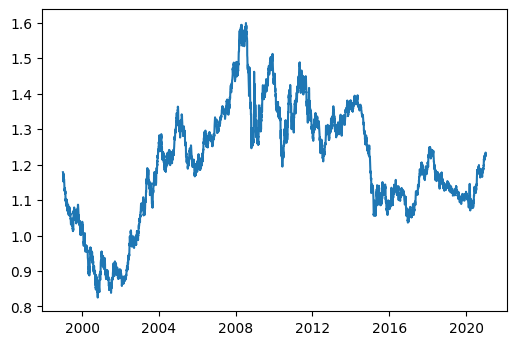

In [57]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

The standard plot shows a relatively noisy dataset. To smooth out the noise, we will use a 30 day rolling mean.

In [58]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()
euro_to_dollar['rolling_mean']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
5694    1.211170
5695    1.212530
5696    1.213987
5697    1.215357
5698    1.216557
Name: rolling_mean, Length: 5637, dtype: float64

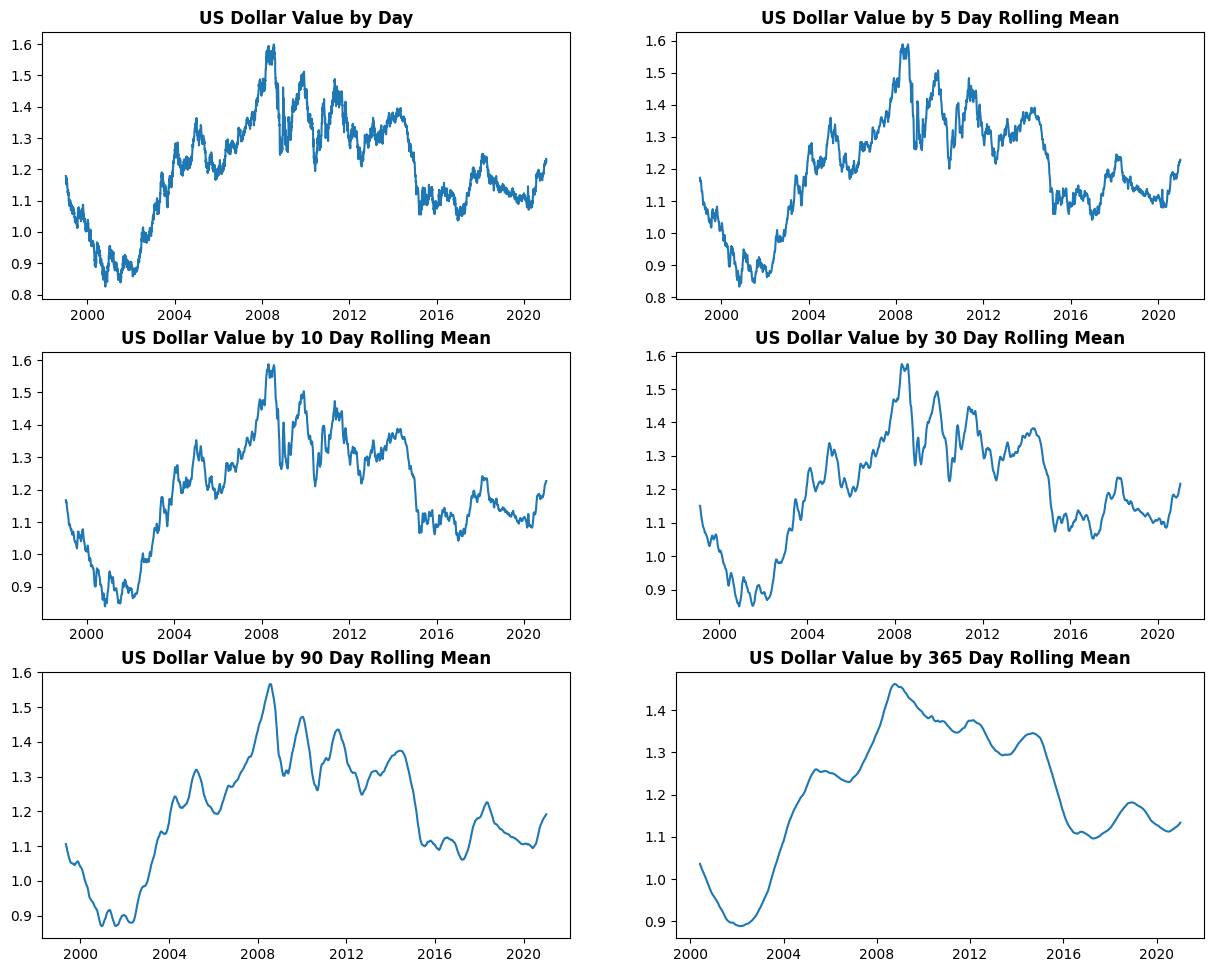

In [59]:
plt.figure(figsize=(15,12))
plt.subplot(3,2,1)
plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'])
plt.title('US Dollar Value by Day' ,weight='bold')

for i, means in zip([2,3,4,5,6],[5, 10, 30, 90, 365]):
    plt.subplot(3,2,i)
    plt.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'].rolling(means).mean())
    plt.title('US Dollar Value by '+ str(means) + ' Day Rolling Mean',weight='bold')
plt.show()

## Story Telling

In the ealy 2000s, the US dollar was worth more than the Eruo. In less than 3 years, the dollar lost value and continued a decline until it was valued at 2/3 of the Euro in 2009. This time period will be examined.

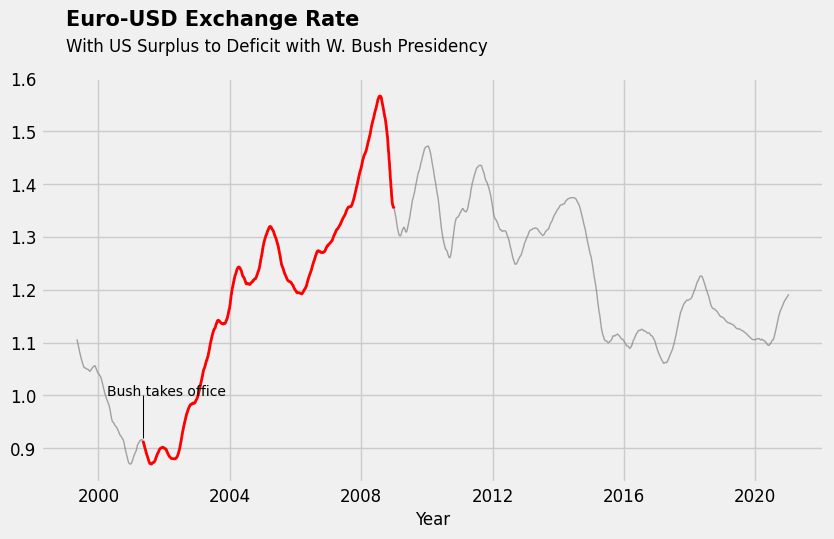

In [123]:
import matplotlib.style as style
from datetime import datetime

dollar_deficit = euro_to_dollar.copy()[(
    euro_to_dollar['Time'].dt.year>=2001)&
    (euro_to_dollar['Time'].dt.year<2009)]

style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(9,5))
ax.plot(euro_to_dollar['Time'],euro_to_dollar['US_dollar'].rolling(90).mean(),
        color='grey',linewidth=1, alpha=0.7)
ax.plot(dollar_deficit['Time'],dollar_deficit['US_dollar'].rolling(90).mean(),
        color='red',linewidth=2)
ax.tick_params(labelsize=12)
ax.tick_params(bottom=0, left=0)
ax.text(datetime(1999,1,1),1.7,'Euro-USD Exchange Rate',weight='bold',
        fontsize=15)
ax.text(datetime(1999,1,1),1.65,
        'With US Surplus to Deficit with W. Bush Presidency',
        fontsize=12)
ax.set_xlabel('Year',fontsize=12)
ax.text(datetime(2000,4,6),1.0,'Bush takes office',fontsize=10)
ax.plot([datetime(2001,5,6),datetime(2001,5,6)],[.92,1.0], color='black',linewidth=.75)
plt.show()



## Conclusion

The increase in exchange rate between the Euro and dollar coincides with W. Bush going into office and beginning the deficit. The peak rate coincides with the economic fallout with the housing crisis in 2008-2009.

More needs to be done on this plot that will be done at a later date when it is more pertinent.